In [15]:
import pandas as pd
data_original = pd.read_csv("data_final.csv")

data = data_original

# Select a specific search query
data = data[data["search_query"].str.contains("2hollis type beat", na=False)]

In [16]:
# Split tags and explode
data_split = data
data_split["tags"] = data_split["tags"].str.split("|")
exploded = data.explode("tags")

# Calculate average views per tag
tag_stats = exploded.groupby("tags")["views"].mean().sort_values(ascending=False)

print(f"\nBased on {data.shape[0]} videos")
print(tag_stats)


Based on 280 videos
tags
free 2hollis type beat 2024    49825.5
2hollis club                   38444.0
twoclose                       38444.0
starboy dance type beat        38444.0
2hollis x trauma type beat     37067.5
                                ...   
2hollis starboy type beat         18.5
2hollis nice                      18.5
2hollis new album 2025            18.5
2hollis 2025                      18.5
2hollis club type beat            18.5
Name: views, Length: 829, dtype: float64


In [20]:
# Show total number of videos (rows in the original dataset)
total_videos = len(data)
print(f"Total number of videos: {total_videos}")

exploded = data_split.explode("tags")

# Count occurrences of each tag
tag_counts = exploded["tags"].value_counts()

# Display tag counts
print("Tag Occurrences:")
print(tag_counts.head())

# Set minimum frequency threshold
MIN_COUNT = 5

# Filter tags by minimum frequency
filtered_exploded = exploded[exploded["tags"].isin(tag_counts[tag_counts >= MIN_COUNT].index)].copy()  # Make a copy here

# Calculate weighted average views
# Use .loc[] to safely modify the dataframe and avoid SettingWithCopyWarning
filtered_exploded["weight"] = filtered_exploded["tags"].map(tag_counts)
filtered_exploded["weighted_views"] = filtered_exploded["views"] * filtered_exploded["weight"]

# Use .agg() instead of .apply() to calculate weighted average views per tag
tag_stats = (
    filtered_exploded.groupby("tags")
    .agg(weighted_avg_views=('weighted_views', 'sum'), total_weight=('weight', 'sum'))
    .reset_index()
)

# Calculate weighted average views for each tag
tag_stats["weighted_avg_views"] = tag_stats["weighted_avg_views"] / tag_stats["total_weight"]

# Sort by weighted average views
tag_stats = tag_stats.sort_values(by="weighted_avg_views", ascending=False)

# Print weighted averages
print("\nWeighted Average Views per Tag:")
print(tag_stats.head())



Total number of videos: 280
Tag Occurrences:
tags
2hollis type beat         229
free 2hollis type beat    141
2hollis type beat free    137
2hollis                   122
type beat                 121
Name: count, dtype: int64

Weighted Average Views per Tag:
                       tags  weighted_avg_views  total_weight
18   2hollis type beat 2024        25725.600000            25
2        2010 edm type beat        25517.571429            49
156       yabujin type beat        25517.571429            49
47     drain gang type beat        23420.000000            49
110   ken carson type beats        22985.000000            36


## Channel Investigation

In [8]:
import pandas as pd

# Load data
data = pd.read_csv("data_final.csv")

# Show total number of videos (rows in the original dataset)
total_videos = len(data)
print(f"Total number of videos: {total_videos}")

# Count videos per channel
channel_counts = data["channel_name"].value_counts()

# Calculate percentage for each channel and round to 1 decimal
channel_percentage = (channel_counts / total_videos) * 100
channel_percentage = channel_percentage.round(1)

# Calculate average views per channel
average_views_per_channel = data.groupby("channel_name")["views"].mean()
average_views_per_channel = average_views_per_channel.round().astype(int)

# Combine counts, percentages, and average views into a DataFrame
channel_stats = pd.DataFrame({
    'video_count': channel_counts,
    'percentage': channel_percentage,
    'average_views': average_views_per_channel
})

# Sort the DataFrame by the percentage column in descending order
channel_stats = channel_stats.sort_values(by="percentage", ascending=False)

# Display the result
print(channel_stats)


Total number of videos: 280
                           video_count  percentage  average_views
channel_name                                                     
siem spark                          26         9.3           7345
tiresss / underrated club           21         7.5           6431
+fiftyzeros                         15         5.4          15093
joalisho                            15         5.4           8212
Klimlords Beats                      9         3.2          20282
...                                ...         ...            ...
twoclose                             1         0.4          38444
wag                                  1         0.4          14164
wholearebby                          1         0.4            125
wtfbennie                            1         0.4          33034
wydastral                            1         0.4            669

[126 rows x 3 columns]


## Title Research

In [9]:
# Compare "free" to "free for profit"

total_rows = len(data)

# Convert titles to lowercase and filter rows for each condition
free_rows = data[data['title'].str.lower().str.contains('free')]
free_for_profit_rows = data[data['title'].str.lower().str.contains('free for profit')]

# Calculate average views and standard deviation for "free"
free_avg_views = free_rows['views'].mean()
free_std_views = free_rows['views'].std()

# Calculate average views and standard deviation for "free for profit"
free_for_profit_avg_views = free_for_profit_rows['views'].mean()
free_for_profit_std_views = free_for_profit_rows['views'].std()

# Calculate count and percentage for "free"
free_count = len(free_rows)
free_percentage = (free_count / total_rows) * 100

# Calculate count and percentage for "free for profit"
free_for_profit_count = len(free_for_profit_rows)
free_for_profit_percentage = (free_for_profit_count / total_rows) * 100

# Create a summary DataFrame
summary_data = {
    "Average Views": [free_avg_views, free_for_profit_avg_views],
    "Standard Deviation": [free_std_views, free_for_profit_std_views],
    "Count": [free_count, free_for_profit_count],
    "Percentage of Total (%)": [free_percentage, free_for_profit_percentage]
}

# Create DataFrame and set categories as index
summary_df = pd.DataFrame(summary_data, index=['free', 'free for profit'])

# Transpose the DataFrame (switch columns and rows)
summary_df = summary_df.T

summary_df.loc['Average Views'] = summary_df.loc['Average Views'].round(1)
summary_df.loc['Standard Deviation'] = summary_df.loc['Standard Deviation'].round(1)
summary_df.loc['Count'] = summary_df.loc['Count']
summary_df.loc['Percentage of Total (%)'] = summary_df.loc['Percentage of Total (%)'].round(1)

# Print the transposed summary table
print(summary_df)


                            free  free for profit
Average Views             8538.3          10194.5
Standard Deviation       13290.6          12884.5
Count                      214.0             60.0
Percentage of Total (%)     76.4             21.4


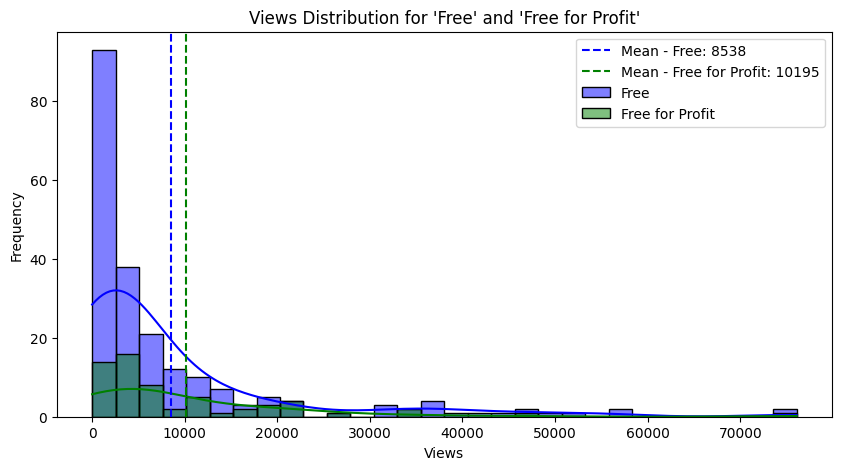

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate means for each group
free_mean = free_rows['views'].mean()
free_for_profit_mean = free_for_profit_rows['views'].mean()

# Plot histograms to visualize the distribution of views
plt.figure(figsize=(10, 5))

# For "free"
sns.histplot(free_rows['views'], kde=True, color='blue', label='Free', bins=30)
# For "free for profit"
sns.histplot(free_for_profit_rows['views'], kde=True, color='green', label='Free for Profit', bins=30)

# Add a vertical dotted line at the mean for "free"
plt.axvline(free_mean, color='blue', linestyle='--', label=f'Mean - Free: {free_mean:.0f}')

# Add a vertical dotted line at the mean for "free for profit"
plt.axvline(free_for_profit_mean, color='green', linestyle='--', label=f'Mean - Free for Profit: {free_for_profit_mean:.0f}')

plt.legend()
plt.title("Views Distribution for 'Free' and 'Free for Profit'")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()
